# Visualizations

Data Science Society General Member Meeting Mini Lecture - April 1, 2019

## Import

In [2]:
from gensim.models import Word2Vec
from nltk.corpus import stopwords 
from sklearn.manifold import TSNE

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Matplotlib and Seaborn

### Line Graphs
You can use the matplotlib function [`plt.plot()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) to create line graphs! The required arguments are a list of x-values and a list of y-values.

In [ ]:
np.random.seed(18) # To ensure that the random number generation is always the same
plt.plot(np.arange(0, 7, 1), np.random.rand(7, 1))

### Bar Graphs

Let's load in a built-in dataset from Seaborn and take a quick look.

In [ ]:
tips = sns.load_dataset('tips')
tips.head()

In [ ]:
val_counts = tips['sex'].value_counts()
val_counts

Bar graphs are plotted in matplotlib using the function `plt.bar()`.

In [ ]:
plt.bar(val_counts.index, val_counts); 

Use `plt.title()`, `plt.xlabel()`, `plt.ylabel()`, and `plt.legend()` as necesssary to label your graphs and make sure that you're giving proper context to your visualizations.

Side note: adding ';' after the function prevents anything extra from being returned, displaying only the desired graph

In [ ]:
plt.bar(val_counts.index, val_counts)
plt.title('Number of Tips Given (by Sex)')
plt.xlabel('Sex')
plt.ylabel('Count'); 

You can also make horizontal bar graphs using `plt.barh()`.

In [ ]:
plt.barh(val_counts.index, val_counts)
plt.title('Number of Tips Given (by Sex)')
plt.xlabel('Count')
plt.ylabel('Sex');

In seaborn, you can use sns.countplot(). This has the optional argument `hue`, which allows you to show another variable.

Note: You can use pandas indexing like we did with matplotlib, or you can pass the dataset into the `data` argument and refer to columns by their names instead.

In [ ]:
sns.countplot(x='sex', hue='smoker', data=tips)
plt.title('Number of Tips Given (by Sex)')
plt.xlabel('Sex')
plt.ylabel('Count');

### Histograms

Histograms can be plotted in matplotlib using `plt.hist()`. This will take one required argument of the x-axis variable.

In [ ]:
plt.hist(tips['total_bill'])
plt.title('Distribution of Total Bills');

In seaborn, using the function `sns.distplot()` will give you a histogram and the kernel density estimation, or kde. This can be turned off by changing the default argument `kde=True` to `kde=False`.

In [ ]:
sns.distplot(tips['total_bill'])
plt.title('Distribution of Total Bills');

In [ ]:
sns.distplot(tips['total_bill'], kde=False)
plt.title('Distribution of Total Bills');

### Scatterplots

Scatterplots can be made in matplotlib using [`plt.scatter()`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html). It takes in two arguments: x-values and y-values.

In [ ]:
plt.scatter(tips['total_bill'], tips['tip'])
plt.title('Total Bill vs Tip Amount')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)');

Let's plot this graph again, but this time coloring the points by whether the customer was male or female.

In [ ]:
plt.figure(figsize=(10, 8)) # Increase the size of the returned plot

# Points with female customer: 'sex' == 'Female'
plt.scatter(x=tips.loc[tips['sex'] == 'Female', 'total_bill'], 
            y=tips.loc[tips['sex'] == 'Female', 'tip'],
            label='Female', alpha=0.6)

# Points with male customers, 'sex' == 'Male'
plt.scatter(x=tips.loc[tips['sex'] == 'Male', 'total_bill'], 
            y=tips.loc[tips['sex'] == 'Male', 'tip'],
            label='Male', alpha=0.6)

plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.title('Total Bill vs Tip Amount (by Sex)')
plt.legend();

To create a scatterplot using seaborn, you can use `sns.lmplot()`. It'll take x-values and y-values, and overlay a least-squares regression line and standard deviation. You can remove these features by passing in `fit_reg=False`.

In [ ]:
sns.lmplot(x='total_bill', y='tip', data=tips)
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.title('Total Bill vs Tip Amount');

Instead of calling the plotting function twice like in matplotlib, we can set the `hue` argument to another column.

In [ ]:
sns.lmplot(x='total_bill', y='tip', hue='sex', data=tips, fit_reg=False)
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.title('Total Bill vs Tip Amount (by Sex)');

## Exercises

We'll do the exercises using a famous dataset: the iris dataset. First, let's load it in and take a look:

In [3]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's also take a look at the different species:

In [4]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

<font color="blue">Exercise:</font> Create a basic scatterplot of the petal lengths versus the petal widths. Label your axes (use the documentation linked above to make them meaningful)!

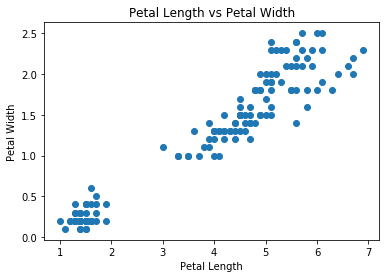

In [11]:
plt.scatter(iris['petal_length'], iris['petal_width'])
plt.title('Petal Length vs Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width');

<font color="blue">Exercise:</font> This time, create the same scatterplot, but assign a different color for each flower species. Use matplotlib!

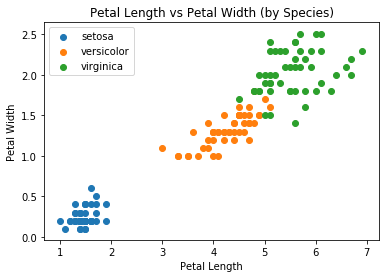

In [12]:
plt.scatter(x=iris.loc[iris['species'] == 'setosa', 'petal_length'],
            y=iris.loc[iris['species'] == 'setosa', 'petal_width'],
            label='setosa')
plt.scatter(x=iris.loc[iris['species'] == 'versicolor', 'petal_length'],
            y=iris.loc[iris['species'] == 'versicolor', 'petal_width'],
            label='versicolor')
plt.scatter(x=iris.loc[iris['species'] == 'virginica', 'petal_length'],
            y=iris.loc[iris['species'] == 'virginica', 'petal_width'],
            label='virginica')
plt.title('Petal Length vs Petal Width (by Species)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend();

<font color="blue">Exercise:</font> Now make the same graph as above, but use seaborn!

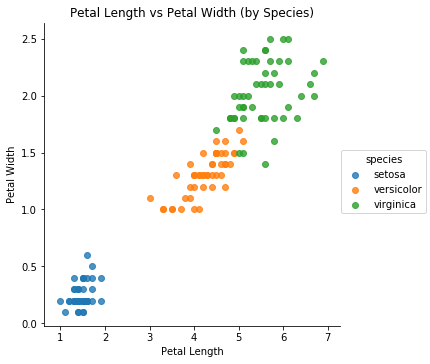

In [13]:
sns.lmplot(x='petal_length', y='petal_width', hue='species', data=iris, fit_reg=False)
plt.title('Petal Length vs Petal Width (by Species)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width');

## TSNE Example

In [ ]:
# https://ocw.mit.edu/ans7870/6/6.006/s08/lecturenotes/files/t8.shakespeare.txt
with open("t8.shakespeare.txt") as f:
    sentences = f.read().split("\n")

In [ ]:
print("First line is", sentences[0])
print("Loaded in", len(sentences), "sentences")
sentences = sentences[:10000]

In [ ]:
corpus = [] # List of all documents, latin for body
stop_words = {'', 'ourselves', 'hers', 'between', 'yourself', 'but', 'again', 'there', 'about', 'once', 'during', 'out', 'very', 'having', 'with', 'they', 'own', 'an', 'be', 'some', 'for', 'do', 'its', 'yours', 'such', 'into', 'of', 'most', 'itself', 'other', 'off', 'is', 's', 'am', 'or', 'who', 'as', 'from', 'him', 'each', 'the', 'themselves', 'until', 'below', 'are', 'we', 'these', 'your', 'his', 'through', 'don', 'nor', 'me', 'were', 'her', 'more', 'himself', 'this', 'down', 'should', 'our', 'their', 'while', 'above', 'both', 'up', 'to', 'ours', 'had', 'she', 'all', 'no', 'when', 'at', 'any', 'before', 'them', 'same', 'and', 'been', 'have', 'in', 'will', 'on', 'does', 'yourselves', 'then', 'that', 'because', 'what', 'over', 'why', 'so', 'can', 'did', 'not', 'now', 'under', 'he', 'you', 'herself', 'has', 'just', 'where', 'too', 'only', 'myself', 'which', 'those', 'i', 'after', 'few', 'whom', 't', 'being', 'if', 'theirs', 'my', 'against', 'a', 'by', 'doing', 'it', 'how', 'further', 'was', 'here', 'than'}
for uncleanSentence in sentences:
    uncleanSentence = uncleanSentence.lower().split(" ")
    cleanSentence = [word for word in uncleanSentence if word not in stop_words]
    corpus.append(cleanSentence) # Accepts list of lists of words
print("Loaded", len(corpus), "documents into the corpus")
print("First five lines added", corpus[0])

In [ ]:
model = Word2Vec(corpus, size=100, window=5, min_count=1, max_vocab_size=300) # Corpus, word vector dimension, skip-gram window, min frequency

In [ ]:
print(model.wv.vocab.keys())

In [ ]:
print(model.wv.most_similar("caesar"))

In [ ]:
words = list(model.wv.vocab.keys())
vectors = [model.wv[word] for word in words]
tsneVectors = TSNE(n_components=2).fit_transform(vectors)
x = [vector[0] for vector in tsneVectors]
y = [vector[1] for vector in tsneVectors]
print(words[0], tsneVectors[0])

In [ ]:
#plt.scatter(x, y, s=100, c='b', alpha=0.5)
plt.figure(figsize=(60,40))
for i, word in enumerate(words):
    x_coord = x[i]
    y_coord = y[i]
    plt.scatter(x_coord, y_coord, s=100, c='b', alpha=0.5)
    plt.text(x_coord+0.3, y_coord+0.3, word, fontsize=30)
plt.show()

That's all for now! Feel free to save this notebook and the slides for future reference.